# Autoencoder improve the classification performance in baseline method - KNN, Logistic Regression, SVM and Random Forest
## Zucheng Han  01.08.2022

## General introduction
**<font>
Typically, we use traditional and rigid machine learning algorithms as benchmarks. Verify the better performance of fancy machine algorithms supported by advanced technologies such as convolution. However, these traditional machine algorithms can still provide inspiration for us to design new machine learning algorithms or new neural network structures. And sometimes due to computational cost considerations, we can also accept these traditional machine learning algorithms such as support vector machines as a feasible solution in practice.  
</font>**

**<font>
After consideration and discussion, our group finally chose some traditional machine learning algorithms such as KNN, Logistic Regression, SVM and Random Forest as the benchmark. With the help of scikit-learn's python library, we first use train_test_split function to split the training and test sets into 80%, 20%. Then, select the most suitable parameters through GridSearchCV function to test the training set under KFold=5. By testing the performance of algorithm in test set, we record the results as reference.    
</font>**
    
**<font>
In fact, in the process of testing the traditional algorithm, we encountered some practical problems, such as the poor performance of the KNN algorithm; in the case of too many input parameters, the calculation time required by the logistic regression and Random Forest is too long. Therefore, in order to appropriately speed up the calculation speed of machine learning algorithms and improve the performance of conventional machine learning algorithms, we designed a simple autoencoder model. The model does not involve convolution process, and only reduces the dimensionality of the image to extract features.   
</font>**
    

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from keras import regularizers
from keras.layers import Input, Dense
from keras.models import Model
from keras.models import load_model

import pandas as pd
from operator import itemgetter
import os

Because the big size images such as $255 \times236$ need long time to compute in the Autoencoder and no significant improve in accuracy. Therefore, the new image size is set in $60 \times55$. All damage images has be fetched and converted to grey images and save in the txt file.

In [2]:
# To simplify the calculation, the images size 60*55 has be converted to grey image and saved as txt file

# get images X and label y
X = np.loadtxt("data.txt")

print(X.shape)

dataLabel = pd.read_csv("label0-896_final_new.csv")

y = dataLabel.loc[:, "human_label"]

(897, 3300)


Give a good trained encoder model in autoencoder and use StandardScaler

In [3]:
encoder = load_model('encoder.h5')

encoded_fea = encoder.predict(X)
    
print(encoded_fea.shape)

scaler_encoder = StandardScaler()

encoded_fea = scaler_encoder.fit_transform(encoded_fea)

X_train_encoder, X_test_encoder, y_train_encoder, y_test_encoder = train_test_split(encoded_fea, y, test_size=0.2, random_state=22)

29/29 [==============================] - 0s 5ms/step
(897, 64)


Directly use StandardScaler to transform

In [4]:
scaler_only = StandardScaler()

X_new = scaler_encoder.fit_transform(X)

X_train_only, X_test_only, y_train_only, y_test_only = train_test_split(X_new, y, test_size=0.2, random_state=22)
# idel state 12，15,42,22

In [5]:
# set the Kfold
# ideal state 20 15
cv = KFold(n_splits=5, shuffle=True, random_state=15)

## Compare knn and autoencoder+knn

**<font>
As the typical non-parametric classification method, the K - Nearest Neighbor algorithm is a very popular benchmark algorithm. The classification of a data point is determined by its surrounding neighbors.
</font>**

**<font>
In KNN, we flatten the input image data first, then normalize and normalize it. By calculating the shortest Euclidean distance between different input image datasets as the criterion for judging neighbors.
</font>**

In [6]:
# knn is simple method, so do not need to adjust parameters
param_grid = {}

grid_only_knn = GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=5, weights="uniform"),param_grid=param_grid,cv=cv,verbose=3)

grid_autoencoder_knn = GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=5, weights="uniform"),param_grid=param_grid,cv=cv,verbose=3)

# fit the only knn method
grid_only_knn.fit(X_train_only,y_train_only)

# fit the autoencoder+knn method
grid_autoencoder_knn.fit(X_train_encoder, y_train_encoder)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................................., score=0.514 total time=   0.0s
[CV 2/5] END ..................................., score=0.438 total time=   0.0s
[CV 3/5] END ..................................., score=0.469 total time=   0.0s
[CV 4/5] END ..................................., score=0.441 total time=   0.0s
[CV 5/5] END ..................................., score=0.315 total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................................., score=0.708 total time=   0.0s
[CV 2/5] END ..................................., score=0.611 total time=   0.0s
[CV 3/5] END ..................................., score=0.657 total time=   0.0s
[CV 4/5] END ..................................., score=0.699 total time=   0.0s
[CV 5/5] END ..................................., score=0.615 total time=   0.0s


GridSearchCV(cv=KFold(n_splits=5, random_state=15, shuffle=True),
             estimator=KNeighborsClassifier(), param_grid={}, verbose=3)

Generate the result

In [7]:
# show the best score
final_score1 = grid_only_knn.best_estimator_.score(X_test_only,y_test_only)

final_score2 = grid_autoencoder_knn.best_estimator_.score(X_test_encoder, y_test_encoder)

print(final_score1, final_score2)

# show the average best score in 5 Kfold
print(grid_only_knn.best_score_, grid_autoencoder_knn.best_score_)

# show detailed teport
print("only knn method report")
print(classification_report(y_test_only, grid_only_knn.predict(X_test_only)))

print("autoencoder+knn method report")
print(classification_report(y_test_encoder, grid_autoencoder_knn.predict(X_test_encoder)))

0.4888888888888889 0.6777777777777778
0.4350330225330225 0.6582944832944834
only knn method report
              precision    recall  f1-score   support

           1       0.41      0.77      0.54        53
           2       0.67      0.31      0.42        13
           3       1.00      0.23      0.37        53
           4       0.49      0.51      0.50        61

    accuracy                           0.49       180
   macro avg       0.64      0.45      0.46       180
weighted avg       0.63      0.49      0.47       180

autoencoder+knn method report
              precision    recall  f1-score   support

           1       0.58      0.68      0.63        53
           2       0.50      0.46      0.48        13
           3       0.98      0.83      0.90        53
           4       0.59      0.59      0.59        61

    accuracy                           0.68       180
   macro avg       0.66      0.64      0.65       180
weighted avg       0.69      0.68      0.68       180



Draw the graph

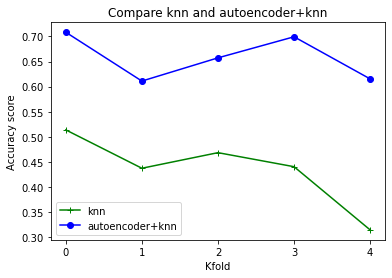

In [8]:
#, "split4_test_score"
Kfold_score_name = ["split0_test_score", "split1_test_score", "split2_test_score", "split3_test_score", "split4_test_score"]
#print(grid_only_knn.cv_results_)
y_accuracy_only_knn = np.array(itemgetter(*Kfold_score_name)(grid_only_knn.cv_results_)).reshape(1,5).flatten()
#, 4
x_kfold = [0, 1, 2, 3, 4]

y_accuracy_autoencoder_knn = np.array(itemgetter(*Kfold_score_name)(grid_autoencoder_knn.cv_results_)).reshape(1,5).flatten()

#print(grid_only_knn.cv_results_["split0_test_score"])

plt.figure("Compare knn and autoencoder+knn")
plt.plot(x_kfold, y_accuracy_only_knn, 'g+-', label='knn')

plt.plot(x_kfold, y_accuracy_autoencoder_knn, 'bo-', label='autoencoder+knn')
plt.legend()
plt.xticks(np.arange(0,5,1))
plt.xlabel('Kfold')
plt.ylabel('Accuracy score')
plt.title("Compare knn and autoencoder+knn")
plt.show()

## Compare Logistic Regression and autoencoder+Logistic Regression

**<font>
Although image damage classification is more of a non-linear problem, we still want to choose linear logistic regression as a benchmark, which is very common in mathematical statistics. In addition, the performance of linear logistic regression can also be compared to support vector machines which can handle nonlinear problems.
</font>**

**<font>
Similar to the way of data processing in KNN, we first flat the image data, then normalize the image data as input. And the output is the label of the data. In this way we form the image pixels as input, multiply by the correlation coefficient to get a polynomial equation. Use polynomials to determine the type of fault damage.
</font>**

In [9]:
# has choose the best parameters
param_grid = {}

grid_only_lr = GridSearchCV(estimator=LogisticRegression(C=1, max_iter=4000, random_state=42, solver='sag'),param_grid=param_grid, cv=cv,verbose=3)

grid_auto_lr = GridSearchCV(estimator=LogisticRegression(C=1, max_iter=4000, random_state=42, solver='sag'),param_grid=param_grid, cv=cv,verbose=3)

# fit the only lr method
grid_only_lr.fit(X_train_only,y_train_only)

# fit the autoencoder+lr method
grid_auto_lr.fit(X_train_encoder, y_train_encoder)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................................., score=0.514 total time= 1.7min
[CV 2/5] END ..................................., score=0.583 total time= 1.7min
[CV 3/5] END ..................................., score=0.636 total time= 1.5min
[CV 4/5] END ..................................., score=0.566 total time= 1.5min
[CV 5/5] END ..................................., score=0.538 total time= 1.5min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................................., score=0.639 total time=   0.2s
[CV 2/5] END ..................................., score=0.625 total time=   0.2s
[CV 3/5] END ..................................., score=0.657 total time=   0.2s
[CV 4/5] END ..................................., score=0.678 total time=   0.2s
[CV 5/5] END ..................................., score=0.643 total time=   0.2s


GridSearchCV(cv=KFold(n_splits=5, random_state=15, shuffle=True),
             estimator=LogisticRegression(C=1, max_iter=4000, random_state=42,
                                          solver='sag'),
             param_grid={}, verbose=3)

Generate the result

In [10]:
# show the best score
final_score1 = grid_only_lr.best_estimator_.score(X_test_only,y_test_only)

final_score2 = grid_auto_lr.best_estimator_.score(X_test_encoder, y_test_encoder)

print(final_score1, final_score2)

# show the average best score in 5 Kfold
print(grid_only_lr.best_score_, grid_auto_lr.best_score_)

# show detailed teport
print("only Logistic Regression method report")
print(classification_report(y_test_only, grid_only_lr.predict(X_test_only)))

print("autoencoder+Logistic Regression method report")
print(classification_report(y_test_encoder, grid_auto_lr.predict(X_test_encoder)))

0.5444444444444444 0.6555555555555556
0.5676961926961926 0.6485819735819736
only Logistic Regression method report
              precision    recall  f1-score   support

           1       0.45      0.47      0.46        53
           2       0.19      0.31      0.24        13
           3       0.88      0.79      0.83        53
           4       0.49      0.44      0.47        61

    accuracy                           0.54       180
   macro avg       0.50      0.50      0.50       180
weighted avg       0.57      0.54      0.55       180

autoencoder+Logistic Regression method report
              precision    recall  f1-score   support

           1       0.64      0.47      0.54        53
           2       0.50      0.46      0.48        13
           3       0.87      0.91      0.89        53
           4       0.53      0.64      0.58        61

    accuracy                           0.66       180
   macro avg       0.64      0.62      0.62       180
weighted avg       0.66 

Draw the graph

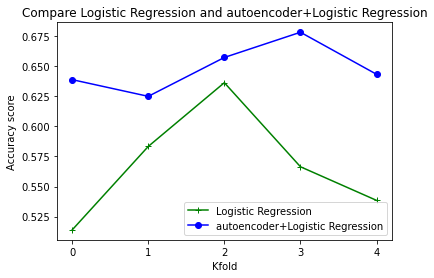

In [11]:
#, "split4_test_score"
Kfold_score_name = ["split0_test_score", "split1_test_score", "split2_test_score", "split3_test_score", "split4_test_score"]
#print(grid_only_knn.cv_results_)
y_accuracy_only_lr = np.array(itemgetter(*Kfold_score_name)(grid_only_lr.cv_results_)).reshape(1,5).flatten()
x_kfold = [0, 1, 2, 3, 4]

y_accuracy_auto_lr = np.array(itemgetter(*Kfold_score_name)(grid_auto_lr.cv_results_)).reshape(1,5).flatten()

#print(grid_only_knn.cv_results_["split0_test_score"])

plt.figure("Compare Logistic Regression and autoencoder+Logistic Regression")
plt.plot(x_kfold, y_accuracy_only_lr, 'g+-', label='Logistic Regression')

plt.plot(x_kfold, y_accuracy_auto_lr, 'bo-', label='autoencoder+Logistic Regression')
plt.legend()
plt.xticks(np.arange(0,5,1))
plt.xlabel('Kfold')
plt.ylabel('Accuracy score')
plt.title("Compare Logistic Regression and autoencoder+Logistic Regression")
plt.show()

## Compare SVM and autoencoder+SVM

**<font>
Through the kernel trick, the SVM can efficiently execute in non-linear classification. And it can implicitly map the preprocessed inputs into initial images with high-dimensional feature spaces. Therefore, we believe that SVM can achieve relatively good performance among traditional machine learning algorithms as benchmarks.
</font>**

**<font>
Similarly, the normalized flat image data is used as input, and the output is the label of the image.
</font>**

In [12]:
# has choose the best parameters
param_grid = {}

grid_only_svm = GridSearchCV(estimator=SVC(C=2,degree=3,random_state=42),param_grid=param_grid, cv=cv,verbose=3)

grid_auto_svm = GridSearchCV(estimator=SVC(C=2,degree=3,random_state=42),param_grid=param_grid, cv=cv,verbose=3)

# fit the only SVM method
grid_only_svm.fit(X_train_only,y_train_only)

# fit the autoencoder+SVM method
grid_auto_svm.fit(X_train_encoder, y_train_encoder)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................................., score=0.688 total time=   0.4s
[CV 2/5] END ..................................., score=0.660 total time=   0.4s
[CV 3/5] END ..................................., score=0.650 total time=   0.4s
[CV 4/5] END ..................................., score=0.678 total time=   0.4s
[CV 5/5] END ..................................., score=0.601 total time=   0.4s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................................., score=0.701 total time=   0.0s
[CV 2/5] END ..................................., score=0.674 total time=   0.0s
[CV 3/5] END ..................................., score=0.706 total time=   0.0s
[CV 4/5] END ..................................., score=0.706 total time=   0.0s
[CV 5/5] END ..................................., score=0.657 total time=   0.0s


GridSearchCV(cv=KFold(n_splits=5, random_state=15, shuffle=True),
             estimator=SVC(C=2, random_state=42), param_grid={}, verbose=3)

Generate the result

In [13]:
# show the best score
final_score1 = grid_only_svm.best_estimator_.score(X_test_only,y_test_only)

final_score2 = grid_auto_svm.best_estimator_.score(X_test_encoder, y_test_encoder)

print(final_score1, final_score2)

# show the average best score in 5 Kfold
print(grid_only_svm.best_score_, grid_auto_svm.best_score_)

# show detailed teport
print("only SVM method report")
print(classification_report(y_test_only, grid_only_svm.predict(X_test_only)))

print("autoencoder+SVM method report")
print(classification_report(y_test_encoder, grid_auto_svm.predict(X_test_encoder)))

0.6777777777777778 0.75
0.6554584304584304 0.688986013986014
only SVM method report
              precision    recall  f1-score   support

           1       0.60      0.68      0.64        53
           2       1.00      0.23      0.38        13
           3       0.93      0.79      0.86        53
           4       0.57      0.67      0.62        61

    accuracy                           0.68       180
   macro avg       0.78      0.59      0.62       180
weighted avg       0.72      0.68      0.68       180

autoencoder+SVM method report
              precision    recall  f1-score   support

           1       0.64      0.68      0.66        53
           2       0.86      0.46      0.60        13
           3       0.98      0.96      0.97        53
           4       0.65      0.69      0.67        61

    accuracy                           0.75       180
   macro avg       0.78      0.70      0.72       180
weighted avg       0.76      0.75      0.75       180



Draw the graph

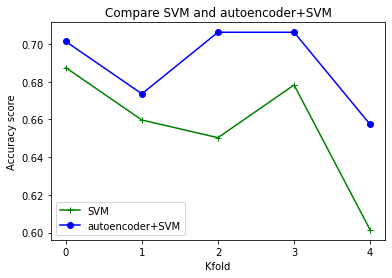

In [14]:
Kfold_score_name = ["split0_test_score", "split1_test_score", "split2_test_score", "split3_test_score", "split4_test_score"]
#print(grid_only_knn.cv_results_)
y_accuracy_only_svm = np.array(itemgetter(*Kfold_score_name)(grid_only_svm.cv_results_)).reshape(1,5).flatten()
x_kfold = [0, 1, 2, 3, 4]

y_accuracy_auto_svm = np.array(itemgetter(*Kfold_score_name)(grid_auto_svm.cv_results_)).reshape(1,5).flatten()

#print(grid_only_knn.cv_results_["split0_test_score"])

plt.figure("Compare Random Forest and autoencoder+Random Forest")
plt.plot(x_kfold, y_accuracy_only_svm, 'g+-', label='SVM')

plt.plot(x_kfold, y_accuracy_auto_svm, 'bo-', label='autoencoder+SVM')
plt.legend()
plt.xticks(np.arange(0,5,1))
plt.xlabel('Kfold')
plt.ylabel('Accuracy score')
plt.title("Compare SVM and autoencoder+SVM")
plt.show()

## Compare Random Forest and autoencoder+Random Forest

**<font>
Normally in all common classification methods, the random forests could reach the highest accuracy. And it could also easily handle huge input data with numerous variables in a short time and automatically balance the dataset when it owns some rare labels. Therefore, we choose random forest as our last traditional machine learning algorithm for comparison.
</font>**

**<font>
In the four classical machine learning algorithms, the same normalization and normalization is performed on the input data, which helps us to summarize and analyze the performance of different conventional machine learning algorithms.
</font>**

In [15]:
# has choose the best parameters
param_grid = {}

grid_only_rf = GridSearchCV(estimator=RandomForestClassifier(criterion="entropy",class_weight="balanced",min_samples_split=5,max_depth=15,n_estimators=200,random_state=15)
                            ,param_grid=param_grid, cv=cv,verbose=3)
#criterion="entropy",class_weight="balanced",min_samples_split=5,max_depth=15,n_estimators=200, 0.76
grid_auto_rf = GridSearchCV(estimator=RandomForestClassifier(criterion="entropy",class_weight="balanced",min_samples_split=5,max_depth=15,n_estimators=200,random_state=15)
                            ,param_grid=param_grid, cv=cv,verbose=3)

# fit the only Random Forest method
grid_only_rf.fit(X_train_only,y_train_only)

# fit the autoencoder+Random Forest method
grid_auto_rf.fit(X_train_encoder, y_train_encoder)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................................., score=0.750 total time=   3.1s
[CV 2/5] END ..................................., score=0.653 total time=   3.2s
[CV 3/5] END ..................................., score=0.720 total time=   3.3s
[CV 4/5] END ..................................., score=0.678 total time=   3.2s
[CV 5/5] END ..................................., score=0.622 total time=   3.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................................., score=0.708 total time=   0.6s
[CV 2/5] END ..................................., score=0.667 total time=   0.6s
[CV 3/5] END ..................................., score=0.720 total time=   0.6s
[CV 4/5] END ..................................., score=0.734 total time=   0.6s
[CV 5/5] END ..................................., score=0.664 total time=   0.6s


GridSearchCV(cv=KFold(n_splits=5, random_state=15, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              criterion='entropy', max_depth=15,
                                              min_samples_split=5,
                                              n_estimators=200,
                                              random_state=15),
             param_grid={}, verbose=3)

Generate the result

In [16]:
# show the best score
final_score1 = grid_only_rf.best_estimator_.score(X_test_only,y_test_only)

final_score2 = grid_auto_rf.best_estimator_.score(X_test_encoder, y_test_encoder)

print(final_score1, final_score2)

# show the average best score in 5 Kfold
print(grid_only_rf.best_score_, grid_auto_rf.best_score_)

# show detailed teport
print("only Random Forest method report")
print(classification_report(y_test_only, grid_only_rf.predict(X_test_only)))

print("autoencoder+Random Forest method report")
print(classification_report(y_test_encoder, grid_auto_rf.predict(X_test_encoder)))

0.7166666666666667 0.7444444444444445
0.6847513597513598 0.6987762237762238
only Random Forest method report
              precision    recall  f1-score   support

           1       0.61      0.64      0.62        53
           2       0.50      0.23      0.32        13
           3       0.94      0.96      0.95        53
           4       0.64      0.67      0.66        61

    accuracy                           0.72       180
   macro avg       0.67      0.63      0.64       180
weighted avg       0.71      0.72      0.71       180

autoencoder+Random Forest method report
              precision    recall  f1-score   support

           1       0.66      0.72      0.68        53
           2       0.83      0.38      0.53        13
           3       0.90      0.98      0.94        53
           4       0.67      0.64      0.66        61

    accuracy                           0.74       180
   macro avg       0.76      0.68      0.70       180
weighted avg       0.74      0.74   

Draw the graph

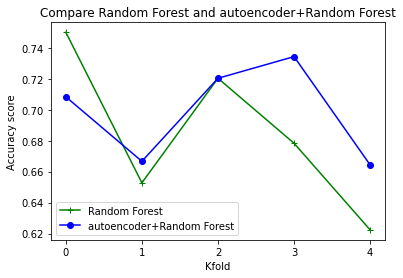

In [17]:
Kfold_score_name = ["split0_test_score", "split1_test_score", "split2_test_score", "split3_test_score", "split4_test_score"]
#print(grid_only_knn.cv_results_)
y_accuracy_only_rf = np.array(itemgetter(*Kfold_score_name)(grid_only_rf.cv_results_)).reshape(1,5).flatten()
x_kfold = [0, 1, 2, 3, 4]

y_accuracy_auto_rf = np.array(itemgetter(*Kfold_score_name)(grid_auto_rf.cv_results_)).reshape(1,5).flatten()

#print(grid_only_knn.cv_results_["split0_test_score"])

plt.figure("Compare Random Forest and autoencoder+Random Forest")
plt.plot(x_kfold, y_accuracy_only_rf, 'g+-', label='Random Forest')

plt.plot(x_kfold, y_accuracy_auto_rf, 'bo-', label='autoencoder+Random Forest')
plt.legend()
plt.xticks(np.arange(0,5,1))
plt.xlabel('Kfold')
plt.ylabel('Accuracy score')
plt.title("Compare Random Forest and autoencoder+Random Forest")
plt.show()

## The hyperparameters of autoencoder
Normally this code will not be running. If you want to train autoencoder model, you could commit the if and else code

**<font>
In the previous tests, we encountered many problems. For example, the classification performance of the KNN algorithm is too poor, and logistic regression and random forests require a long calculation time when large-scale images are used as input. Therefore, in order to optimize the computation time and properly improve the accuracy, it is necessary to choose an appropriate dimensionality reduction method. The dimensionality reduction method is used to extract the features in the picture, and the features are used as the input of the above model, and the performance of different traditional models is compared under the same parameters.
</font>**

**<font>
It is worth noting that the visualization of classification after simply reducing the dimensionality of the data to two or three dimensions is not ideal. The main reason is that we do not have a clear standard for the damage labeled as other, and the proportion of these pictures is small. The pictures defined as other damage will be randomly distributed among the other three fault types after dimensionality reduction, which leads to a significant reduction in the accuracy of the model classification. A picture of its visualization can be seen in tsne dimensionality reduction in data calibration.
</font>**

**<font>
Obviously, common nonlinear dimensionality reduction algorithms such as t-sne are not suitable for our current needs. Therefore, we decided to design our own autoencoder model to reduce the data to 64-dimensional features. In addition, in order to reflect the classicality and limitations of traditional machine learning algorithms, the autoencoder model is designed without adding convolutional layers. The hyperparameters of autoencoder could be seen in code.
</font>**


In [18]:
bottleneck_size = 64

input_img = Input(shape=(3300,))


encoded = Dense(2048, activation='relu')(input_img)
encoded = Dense(512, activation='relu')(encoded)
encoded = Dense(bottleneck_size, activation='linear')(encoded)
encoder = Model(input_img, encoded)


encoded_input = Input(shape=(bottleneck_size,))
decoded = Dense(512, activation='relu')(encoded_input)
decoded = Dense(2048, activation='relu')(decoded)
decoded = Dense(3300, activation='sigmoid')(decoded)


decoder = Model(encoded_input, decoded)

full = decoder(encoder(input_img))
ae = Model(input_img, full)
ae.compile(optimizer='adam', loss='mse')


X = np.loadtxt("data.txt")

print(X.shape)

dataLabel = pd.read_csv("label0-896.csv")

y = dataLabel.loc[:, "human_label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=36)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


if "encoder.h5" in os.listdir():
    #ae = load_model('model.h5')
    encoder = load_model('encoder.h5')
    #decoder = load_model('decoder.h5')
else:
    ae.fit(X_train, X_train, 
        epochs = 500,
        batch_size = 256,
        shuffle=True,
        validation_data=(X_test, X_test),
        max_queue_size=10)
    #ae.save('model.h5')
    encoder.save('encoder.h5')
    #decoder.save('decoder.h5')



(897, 3300)


## Result and Restriction to the conventional algorithm
**<font>
As we thought, in the case of data dimensionality reduction without using autoencoder, among the traditional algorithms, the random forest algorithm has the highest classification accuracy. At the same time, in view of the problems encountered by traditional algorithms in practice, such as the low accuracy of KNN, and the long calculation time required for logistic regression and random forest algorithms. The data after dimensionality reduction through autoencoder greatly improves the accuracy of KNN algorithm identification, greatly reduces the time required for the calculation of logistic regression and random forest algorithms, and also improves the classification accuracy of other traditional machine learning model algorithms(More detailed results can be seen in the jupyter notebook file on gitlab).
</font>**

**<font>
However, we also noticed the limitations of traditional algorithms. The autoencoder data dimensionality reduction model significantly improves the accuracy of traditional machine learning models with low initial classification accuracy. And it is difficult to further more improve the accuracy after 70%. The reason is that traditional machine learning algorithms rarely perform convolution operations to extract local features of objects, and the efficiency of summarizing and extracting image feature information is low.
</font>**